In [1]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt

In [2]:
#first class

In [3]:
np.random.seed(17)

In [4]:
train_data = np.random.normal(size=(100, 2))

In [5]:
train_labels = np.zeros(100)

In [6]:
#second class

In [7]:
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]

In [8]:
train_labels = np.r_[train_labels, np.ones(100)]

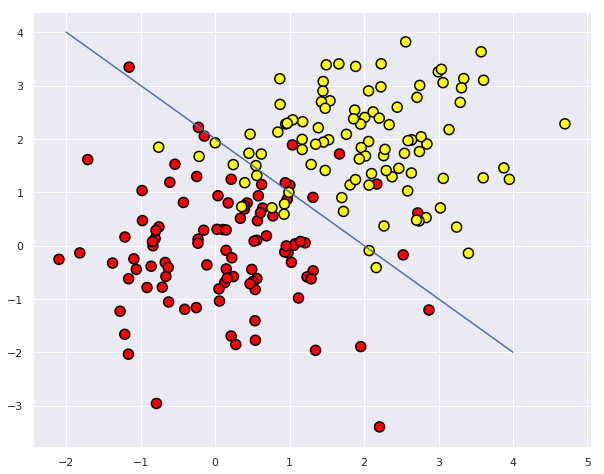

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
           cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max()+1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max()+1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [12]:
xx, yy = get_grid(train_data)

In [13]:
np.c_[xx.ravel(), yy.ravel()]

array([[-3.09812613, -4.39993078],
       [-3.08812613, -4.39993078],
       [-3.07812613, -4.39993078],
       ...,
       [ 5.67187387,  4.81006922],
       [ 5.68187387,  4.81006922],
       [ 5.69187387,  4.81006922]])

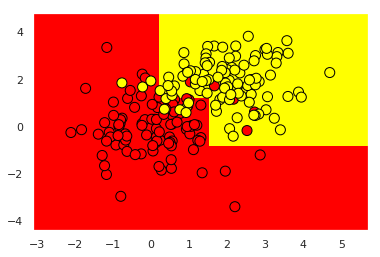

In [14]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max()+1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max()+1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                 random_state=17)
#training the tree
clf_tree.fit(train_data, train_labels)

#plots
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
           cmap='autumn', edgecolors='black');

In [15]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

In [16]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names,
                              filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [17]:
tree_graph_to_png(clf_tree, feature_names=['x1', 'x2'], png_file_to_save='check.png')

In [22]:
df = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33],
                    'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})

In [29]:
df['Loan Default'].values

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [49]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(df2[['Age', 'Salary']].values, df['Loan Default'].values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [50]:
tree_graph_to_png(age_tree, feature_names=['Age', 'Salary'], png_file_to_save='age_tree2.png')

In [46]:
df2 = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33],
                    'Loan Default': [1,0,1,0,1,0,0,1,1,0,1],
                  'Salary': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88]})

In [47]:
df2.sort_values('Age')

Age  Loan Default  Salary
0    17             1      25
2    18             1      22
3    20             0      36
7    25             1      70
8    29             1      33
9    31             0     102
10   33             1      88
4    38             1      37
5    49             0      59
6    55             0      74
1    64             0      80

In [56]:
n_train  = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return (np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2))

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y  = np.exp(-X ** 2) + 1.5 * np.exp(-(X-2)**2) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

In [59]:
X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

In [62]:
reg = DecisionTreeRegressor(max_depth=5, random_state=17)

In [65]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=17, splitter='best')

In [66]:
pred = reg.predict(X_test)

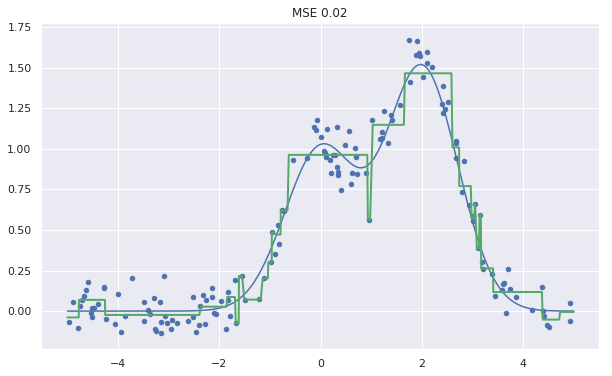

In [86]:
plt.figure(figsize=(10,6))
plt.plot(X_test, f(X_test), 'b')
plt.scatter(X_train, y_train, c='b', s=20)
plt.plot(X_test, pred, 'g', lw=2)
plt.title('MSE %.2f' % mse(pred, y_test))
plt.show()

In [88]:
import os
df = pd.read_csv('{}/bigml.csv'.format(os.getcwd()))

In [99]:
df['international plan'] = pd.factorize(df['international plan'])[0]
df['voice mail plan'] = pd.factorize(df['voice mail plan'])[0]
df['churn'] = df['churn'].astype('int')
states = df['state']
y = df['churn']
df.drop(['state', 'churn'], axis=1, inplace=True)

In [113]:
df.drop(['phone number'], axis=1, inplace=True)

In [114]:
df.head()

account length  area code  international plan  voice mail plan  \
0             128        415                   0                0   
1             107        415                   0                0   
2             137        415                   0                1   
3              84        408                   1                1   
4              75        415                   1                1   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

In [115]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [116]:
X_train, X_val, y_train, y_val = train_test_split(df, y, random_state=17)

In [117]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

In [118]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [120]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
tree_pred = tree.predict(X_val)
knn_pred = knn.predict(X_val_scaled)

In [128]:
'Accuracy tree: %.2f' % accuracy_score(y_val, tree_pred)

'Accuracy tree: 0.94'

In [141]:
'Accuracy knn: %.2f' % accuracy_score(y_val, knn_pred)

'Accuracy knn: 0.88'

In [131]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [132]:
tree_params = {
    'max_depth': range(1,11),
    'max_features': range(4, 19)
}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    4.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': range(4, 19), 'max_depth': range(1, 11)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [133]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 14}

In [134]:
tree_grid.best_score_

0.9419767907162865

In [149]:
accuracy_score(y_val, tree_grid.predict(X_val))

0.9400479616306955

In [150]:
tree_graph_to_png(tree_grid.estimator, df.columns, 'tree_cv.png')

In [151]:
from sklearn.pipeline import Pipeline

In [154]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'knn__n_neighbors': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [156]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 7}, 0.8875550220088035)

In [159]:
accuracy_score(y_val, knn_grid.predict(X_val_scaled))

0.86810551558753